In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
covid_data_pd = pd.read_csv('covid_data.csv', sep=',', header=None)
covid_data = np.array(covid_data_pd)
covid_data = np.delete(covid_data, 0, 0)

In [ ]:
Y = covid_data[:, 4]
Y = Y.reshape(Y.shape[0], 1)
Y = Y.astype(np.int)
X = np.array(range(Y.shape[0]))
X = X.reshape(X.shape[0], 1)
X = X / max(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1, shuffle=False)

n = len(X)
W = np.random.rand()
b = 0
iterations = 30000
learning_rate = 0.001

In [ ]:
def compute_cost(n, Y, Yhat):
    cost = np.sum((Yhat - Y) ** 2) / (2. * n)
    return cost


def compute_Yhat(W, X, b):
    Yhat = X * W + b
    return Yhat


def update_parameters(W, b, Y, Yhat, X, learning_rate, n):
    dW = (np.sum(X * (Yhat - Y))) / n
    W = W - learning_rate * dW
    db = (np.sum(Yhat - Y)) / n
    b = b - learning_rate * db
    return W, b


def predict(x, W, b):
    return W * x + b

In [ ]:
# Learn
for i in range(iterations):
    Yhat = compute_Yhat(W, X_train, b)
    J = compute_cost(n, Y_train, Yhat)
    if (i % 150 == 0):
    #     plt.figure()
    #     plt.subplot()
    #     plt.plot(X_train, Yhat, X_train, Y_train, 'ro')
    #     plt.show()
        print("J=", J)
        print("W=", W)
        print("b=", b)
        print()
    W, b = update_parameters(W, b, Y_train, Yhat, X_train, learning_rate, n)

J= 1329845.282378557
W= 0.8339086119348577
b= 0

J= 1091508.581654498
W= 91.66297784937427
b= 165.7088856718606

J= 910764.2914908825
W= 172.91385415226614
b= 308.8131787687838

J= 773554.786946198
W= 245.8252192096885
b= 432.2710856566049

J= 669255.3019343208
W= 311.4740087034732
b= 538.6543389022181

J= 589835.6112135629
W= 370.79654159825674
b= 630.1986843880561

J= 529226.4332104262
W= 424.6068892114837
b= 708.8477730478821

J= 482840.55997479975
W= 473.6128446443458
b= 776.2913188103721

J= 447210.9292394752
W= 518.4298060501907
b= 833.998271783699

J= 419717.08082207263
W= 559.5928462659706
b= 883.2456578644943

J= 398378.41353506286
W= 597.5672057309474
b= 925.1436508872914

J= 381697.9296342172
W= 632.7574146663211
b= 960.6573694760455

J= 368544.13753276574
W= 665.515223582089
b= 990.62582646588

J= 358061.7943696838
W= 696.1464977851529
b= 1015.7784028686756

J= 349604.4456164764
W= 724.9172112262185
b= 1036.74916976342

J= 342683.438792526
W= 752.058657343252
b= 1054.089339

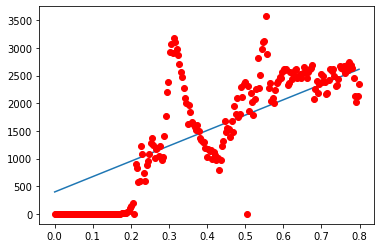

Error =  376321.1664571179     W =  2777.7683281874324     b =  397.3035027452991


In [ ]:
plt.figure()
plt.subplot()
plt.plot(X_train, Yhat, X_train, Y_train, 'ro')
plt.show()
predicts = predict(X_test, W, b)
err = mean_squared_error(Y_test, predicts)
print("Error = ", err, "    W = ", W, "    b = ", b)